# The Clusters of Los Angeles Airbnbs

__Introduction: What is Airbnb?__

Airbnb is best described as an online marketplace in which people can rent out their entire property or a spare room to guests for a range of time. Potential renters can create an account and profile and look for listings that fit their scheduled travel needs. They can choose from a range of rooming options that include a private room (often times the host lives in the property), a shared room (similar to a hostel), or the entire property itself.  Meanwhile, hosts, the owners of listed properties can vet and accept potential renters. Airbnb then charges both the renter and the host a commission for helping arrange the rental agreement. Currently, Airbnb operates worldwide with notable presences in New York City, San Francisco, and Los Angeles. Recently, Airbnb has faced legal pushback and regulation from local city governments over its role as a propagator of illegal short-term rental units. Our analysis will focus predominantly on Los Angeles and the phenomenon of illegal Airbnb listings.

An Airbnb listing can be considered illegal if it violates the city’s, state’s, or district’s short-term rental laws. For Los Angeles, new requirements and restrictions are currently being debated in the city council. The most impactful includes: a rental cap of 120 days a year with possibility for extension and a non-negotiable 120 days cap for rent stabilized properties. Proponents of this bill argue that it would prevent landlords from converting their multi-family housing properties in makeshift hotels for short term rentals. They argue that landlords are incentivized to do this because they could easily sell their rooms as short-term rentals for a much higher profit with Airbnb’s average LA nightly listing price at 202$ (gathered from our dataset). Anecdotal evidence also suggests that many hosts have more than one listing and are often not living in those properties at all. By exclusively renting multiple properties to short term visitors, the supply of rental units in Los Angeles that can house families dramatically decreases causing a rise in rental prices. This problem is further exacerbated if the property is legally rent controlled. Taking into consideration Los Angeles’s housing crisis, lack of affordable housing, and lack of rent control laws, legislation to further regulate short term rentals that could affect housing prices is a major talking point. With our research and model, we hope to better define those that abuse the Airbnb platform at the detriment of the local community versus those that use the platform as a secondary source of income.


__The Data: Breakdown__

Our dataset comes from InsideAirbnb, a website whose community has web scraped from publicly available information from the Airbnb website in the hopes of adding data to the debate. The data has been roughly cleansed and aggregated by themselves. Our original dataset has approximately 44000 observations with 96 variables. Each observation is an individual listing on the Airbnb website filtered for the city of Los Angeles. Within each row, there are variables describing specific features tracked on the Airbnb platform. Each listing is identified by a unique ID number which is then connected to a host. Each host, similarly has a unique ID number. An interesting feature of Airbnb is that hosts can have multiple listings and listings can also have multiple hosts. Similarly, a single property can be divided up into multiple listings.


For our analysis, we have chosen to reduce the number of variables we are looking at, as a majority of them are unusable in a clustering model. These mainly include URL-links, host name, and multiple other categorical variables with many unique observations. From the 96 variables we have chosen to focus on 24 variables to analyze and utilize in our clustering. Their names and descriptions are below.

|Variable|Description|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Id| Refers to the property/listings unique identifying number.|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Host_id|	Refers to the host’s unique identifying number.|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Host_since|	Originally this variable was the exact date the host first started hosting on Airbnb. Unit: date converted into years|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Host_response_rate|	The rate at which a host will respond to a query from potential renters or active renters. Unit: percentage|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Host_total_listings_count|	The total number of listings a host has on Airbnb. Unit: number of listings|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Latitude|	The latitude coordinates of the listing. Unit: degrees|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Longitude|	The longitude coordinates of the listing. Unit: degrees|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Room_type| The type of room being listed. Options include: entire property, bedroom, shared bedroom. Unit: originally categorical converted to numeric with range of 0 to 1.|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Accommodates|	Number of people the listing can accommodate. Unit: people|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Bathrooms|	Number of bathrooms in listing. Unit: rooms|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Bedrooms|	Number of bedrooms in listing. Unit: rooms|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Beds|	Number of beds in listing. Unit: beds|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Price|	Nightly price for renting the listing. Unit: Dollars per night|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Security_deposit|	Security deposit for renting listing (may or may not be required). Unit: Dollars|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Cleaning_fee|	Cleaning fee charged after rental terms. Unit: Dollars|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Guests_included|	Number of guests allowed for rental price. Unit: People|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Extra people|	Amount extra charged for extra guests. Unit: Dollars per night|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Minimum_nights|	Minimum nights needed to make a booking. Unit: nights|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Maximum_nights|	Max nights a booking can go on for. Unit: nights|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Availability_30|	Number of days the listing is/was available in the next 30 days. The property may be booked during this time. Unit: days|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Availability_60|	Number of days the listing is/was available in the next 60 days. Unit: days|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Availability_365|	Number of days the listing is/was available in the next 260 days. Unit: days|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|Reviews_per_month|	Number of reviews the listing received per month. Unit: Reviews per month|
|--------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|

# The Data: Cleanup

For the most part, the InsideAirbnb did a phenomenal presenting clean and well formatted data for exploration and processing. Missingness data was sparse and if present was easily managed. We made a few minor changes and adjustments so that a clustering model could be more readily applied to the set. The majority of changes included converting variables improperly labeled as categorical into numeric types. For the host_since variable we converted the date into the number of years the host has actively been listing out properties on Airbnb. NaN values of host_response_rate was implied to be 0 as a renter never reached out to a host for a query. Similar treatment was given to security_deposit, cleaning_fee, and reviews_per_month. The bedrooms, bathrooms, and beds variable were imputed to the means of their respective variables. The categorical variable of room_type was converted to a numerical variable using the following conversion: entire home to 1, private room to .5, and shared room to .25. 


After our cleanup procedure we were left with 44504 observations and 24 variables. We elected to drop 3 observations, a small amount, because of their null status. Every variable is classified as a numeric.

In [288]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import mplleaflet
from sklearn.cluster import KMeans


In [267]:
airbnb = pd.read_csv("listings.csv")
airbnb.shape

(44504, 96)

In [268]:
i = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18, 20, 21, 23,24,25, 27,28,29,30,31,32, 34,35,36,37,39,40,41,42,43,44,45,46,47, 50,51,57,58,59,61,62,69,70,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94]
airbnb = airbnb.drop(airbnb.columns[i], axis=1)
airbnb.head()

,id,host_id,host_since,host_response_rate,host_total_listings_count,neighbourhood,latitude,longitude,room_type,accommodates,...,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,reviews_per_month
0,109,521,2008-06-27,NaN,1.0,Culver City,33.982095,-118.384935,Entire home/apt,6,...,$240.00,3,$25.00,7,730,0,0,0,203,0.02
1,344,767,2008-07-11,100%,1.0,Burbank,34.165616,-118.334582,Entire home/apt,6,...,$200.00,1,$0.00,2,14,0,6,6,109,0.14
2,2404,2633,2008-08-30,NaN,1.0,Del Rey,33.984640,-118.440064,Shared room,1,...,NaN,1,$21.00,1,730,30,60,90,365,NaN
3,2708,3008,2008-09-16,100%,2.0,NaN,34.097676,-118.346023,Private room,1,...,$91.00,1,$0.00,6,366,0,19,19,268,0.24
4,2732,3041,2008-09-17,100%,2.0,Santa Monica,34.004750,-118.481266,Private room,1,...,$100.00,1,$0.00,1,180,19,49,79,354,0.19


In [269]:
airbnb.keys()

Index(['id', 'host_id', 'host_since', 'host_response_rate',
       'host_total_listings_count', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'reviews_per_month'],
      dtype='object')

In [270]:
# Response Rate
airbnb.host_response_rate = pd.to_numeric(airbnb.host_response_rate.str.strip('%'))
airbnb.host_response_rate = airbnb.host_response_rate.fillna(0)

#Security Deposit
airbnb.security_deposit = airbnb.security_deposit.str.strip("$")
airbnb.security_deposit = airbnb.security_deposit.str.replace(",", "")
airbnb.security_deposit = airbnb.security_deposit.fillna(0)
airbnb.security_deposit = pd.to_numeric(airbnb.security_deposit)

#Bedrooms and Bathrooms
airbnb.bathrooms = airbnb.bathrooms.fillna(np.mean(airbnb.bathrooms))
airbnb.bedrooms = airbnb.bedrooms.fillna(np.mean(airbnb.bedrooms))
airbnb.beds = airbnb.beds.fillna(np.mean(airbnb.beds))

#Extra Fees
airbnb.cleaning_fee = airbnb.cleaning_fee.str.strip("$")
airbnb.cleaning_fee = airbnb.cleaning_fee.str.replace(",", "")
airbnb.cleaning_fee = airbnb.cleaning_fee.fillna(0)
airbnb.cleaning_fee = pd.to_numeric(airbnb.cleaning_fee)

airbnb.extra_people = pd.to_numeric(airbnb.extra_people.str.strip('$'))

#Reviews per month
airbnb.reviews_per_month = airbnb.reviews_per_month.fillna(0)

#Price
airbnb.price = airbnb.price.str.strip("$")
airbnb.price = airbnb.price.str.replace(",", "")
airbnb.price = pd.to_numeric(airbnb.price)

airbnb.host_since = 2018 - pd.to_numeric(airbnb.host_since.str[0:4])

In [271]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44504 entries, 0 to 44503
Data columns (total 25 columns):
id                           44504 non-null int64
host_id                      44504 non-null int64
host_since                   44501 non-null float64
host_response_rate           44504 non-null float64
host_total_listings_count    44501 non-null float64
neighbourhood                40377 non-null object
latitude                     44504 non-null float64
longitude                    44504 non-null float64
room_type                    44504 non-null object
accommodates                 44504 non-null int64
bathrooms                    44504 non-null float64
bedrooms                     44504 non-null float64
beds                         44504 non-null float64
price                        44504 non-null float64
security_deposit             44504 non-null float64
cleaning_fee                 44504 non-null float64
guests_included              44504 non-null int64
extra_people     

In [272]:
airbnb = airbnb.dropna()

In [273]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40375 entries, 0 to 44503
Data columns (total 25 columns):
id                           40375 non-null int64
host_id                      40375 non-null int64
host_since                   40375 non-null float64
host_response_rate           40375 non-null float64
host_total_listings_count    40375 non-null float64
neighbourhood                40375 non-null object
latitude                     40375 non-null float64
longitude                    40375 non-null float64
room_type                    40375 non-null object
accommodates                 40375 non-null int64
bathrooms                    40375 non-null float64
bedrooms                     40375 non-null float64
beds                         40375 non-null float64
price                        40375 non-null float64
security_deposit             40375 non-null float64
cleaning_fee                 40375 non-null float64
guests_included              40375 non-null int64
extra_people     

# Initial Exploration: Summary Statistics and Distributions

Our initial hypothesis is that we believe Airbnb listings cluster around three categories: part-time listings as a means of supplemental income for the host (both partial and entire listings), full-time listings of portions of a property as a primary means of income for the host, and full-time listings of entire properties as a primary business income for the host. Thus we started our model building by initially exploring the distribution of key variables we think would play important roles in separating out potential clusters.

Our table of means and standard deviations is below:

In [274]:
pd.DataFrame({"mean": airbnb.mean(), "sd": airbnb.std()})

,mean,sd
id,1.767506e+07,8.608885e+06
host_id,6.387065e+07,6.457197e+07
host_since,3.132929e+00,2.066749e+00
host_response_rate,5.857709e+01,4.788782e+01
host_total_listings_count,7.650452e+00,2.947483e+01
latitude,3.405381e+01,9.312406e-02
longitude,-1.183378e+02,1.299467e-01
accommodates,3.658353e+00,2.657751e+00
bathrooms,1.449151e+00,9.524918e-01
bedrooms,1.399393e+00,1.103268e+00


__Room Type__

Below is a bar plot of the different types of Airbnb listings and their frequencies in Los Angeles. As expected, entire homes and apartments are most likely to be listed. What is more surprising is that shared rooms are the next largest group followed by private rooms. As a consequence, Airbnb’s statement that a large portion of their hosts are people listing private portions of their properties as a means of supplemental income is questionable (at least in Los Angeles). The larger than expected number of shared room listings can most likely be attributed to Los Angele’s vibrant hostel community. Hostels are allowed and also frequently listed on Airbnb. A hostel is defined as an inexpensive, supervised lodging place frequented by young travelers. They often provide communal housing in a mix-gendered bedroom or sometimes in private bedrooms. 

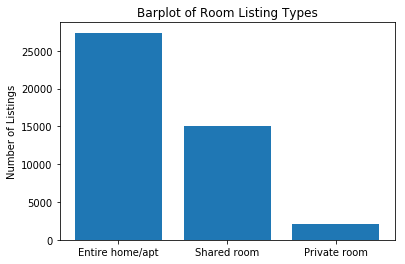

In [275]:
airbnb_orig = pd.read_csv("listings.csv")
a = airbnb_orig.room_type.value_counts()
plt.bar(airbnb_orig.room_type.unique(), a)
plt.ylabel("Number of Listings")
plt.title("Barplot of Room Listing Types")
plt.show()

__Price__

We initially thought that listing price could also play a large part in defining our clusters. Below is a table of the mean listing prices for the various room types and an accompanying histogram of all room types.

In [276]:
airbnb.price.mean()

204.52039628482973

In [277]:
print(airbnb.groupby("room_type").price.mean())

room_type
Entire home/apt    274.850191
Private room        90.607771
Shared room         51.750127
Name: price, dtype: float64


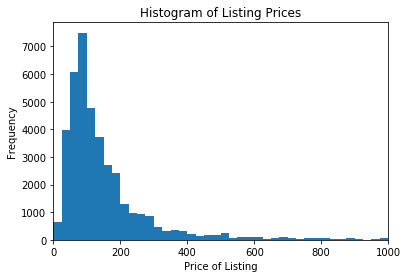

In [278]:
plt.hist(airbnb.price, bins=1000)
plt.xlim(0,1000)
plt.xlabel("Price of Listing")
plt.ylabel("Frequency")
plt.title("Histogram of Listing Prices")
plt.show()

As the percentage of the property listed increases, we see that the price of the listing also increases. It is apparent that the total average price of all LA Airbnb listings is dramatically affected by the much larger prices charged by entire property listings. The large tail of values exhibited in the histogram of prices is also due to entire property listings, most likely upscale ones. 

Text(0.5,1,'Log Price per Room Type')

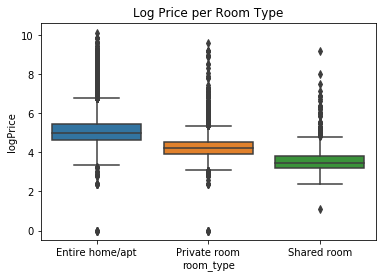

In [279]:
airbnb["logPrice"] = np.log(airbnb.price+1)
sns.boxplot(x = "room_type", y = "logPrice", data = airbnb, order = ["Entire home/apt", "Private room", "Shared room"]).set_title("Log Price per Room Type")

Room type seems to be one of the factors that contributes most to listing price. In the plots below, you can see that as you gain more privacy the prices tend to increase. In the boxplot below the log price seems to decrease depending on how much privacy one gets. An entire home/apt will give you the most amount of privacy while a shared room will give you the least amount of privacy.

It is worth noting that the average rent for a one bedroom LA apartment is around 1950 dollars. Homeowners who own multiple properties and list them on Airbnb stand to make huge profits by listing their properties online and charging on average 276 a night.  Host renting out a private or shared room while, they themselves, also live in the listing do not make as much of a profit. In fact, the per night rent of that same one bedroom LA apartment is about 65 dollars. Airbnb’s argument that its service is also used by homeowners to supplement an otherwise unaffordable house is valid but exaggerated in the sense of the scope of its occurrence. Prices in conjunction with the distribution of room type listings simply don’t point to that scenario as the norm.

__Number of Listings__

Below is a histogram of the number of listings LA hosts have. On average most hosts have 2 listings on the service but a vast majority only one have one. The histogram below illustrates two key properties: 1. A majority of hosts have only one listing. 2. There are multiple hosts that have far more than 2 listings. Of peculiar interest, is that the host with the most listings is totaled at 808. There are two explanations for this: the dataset has an error or this host has multiple listings worldwide. Either way, the histogram below shows that Airbnb’s platform is often used by hosts as a marketplace to sell extra properties at above rent market price values. 

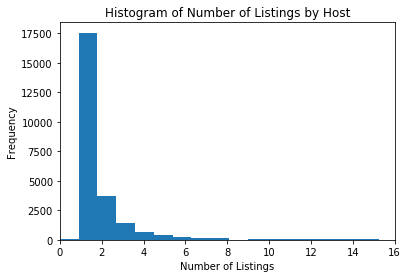

In [280]:
a = airbnb.groupby("host_id").first().host_total_listings_count.dropna()
plt.hist(a, bins = 900)
plt.xlim(0,16)
plt.xlabel("Number of Listings")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Listings by Host")
plt.show()

In [281]:
a.mean()

2.1311765652663768

__Listing Availability__

The final variable that we think is extremely differentiating of our clusters is listing availability. We’ve separated out the listing availabilities for our different types of room listings and compared their histograms. They are shown below.

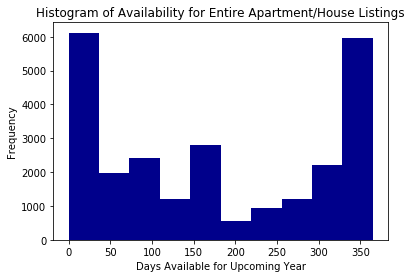

In [282]:
a = airbnb.availability_365[airbnb.room_type == "Entire home/apt"]
plt.hist(a, color = "darkblue")
plt.xlabel("Days Available for Upcoming Year")
plt.ylabel("Frequency")
plt.title("Histogram of Availability for Entire Apartment/House Listings")
plt.show()

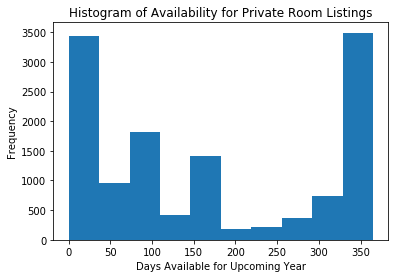

In [283]:
a = airbnb.availability_365[airbnb.room_type == "Private room"]
plt.hist(a)
plt.xlabel("Days Available for Upcoming Year")
plt.ylabel("Frequency")
plt.title("Histogram of Availability for Private Room Listings")
plt.show()

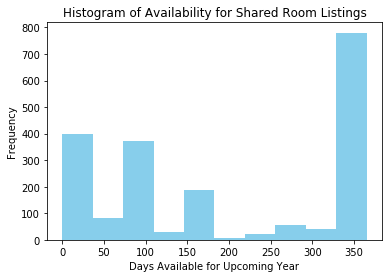

In [284]:
a = airbnb.availability_365[airbnb.room_type == "Shared room"]
plt.hist(a, color = "skyblue")
plt.xlabel("Days Available for Upcoming Year")
plt.ylabel("Frequency")
plt.title("Histogram of Availability for Shared Room Listings")
plt.show()

Surprisingly, all the room types exhibit similar distribution shapes. No matter what room type, we see that listings are typically of two extremes: extremely low availability to extremely high availability. The most frequent values falling in between 0-50 days of availability or 325+ days of availability. Mid availability between 175 to 300 days in the year is much less prevalent than either very limited yearly availability (0-50) or open availability (365 days a year). Thus, there is a lot of promise in availability as a clustering criterion.

Text(0,0.5,'Price of Listing')

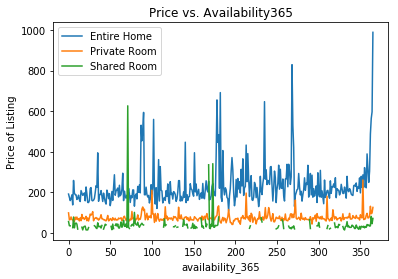

In [285]:
EntireHome = airbnb.loc[airbnb.room_type == "Entire home/apt"].groupby('availability_365').price.mean()
PrivateRoom = airbnb.loc[airbnb.room_type == "Private room"].groupby('availability_365').price.mean()
SharedRoom = airbnb.loc[airbnb.room_type == "Shared room"].groupby('availability_365').price.mean()

Price = pd.DataFrame({'Entire Home': EntireHome, 'Private Room' : PrivateRoom, 'Shared Room' : SharedRoom})

Price.plot(title = "Price vs. Availability365")
plt.ylabel('Price of Listing')

In the above plot, you can see that the price of an entire home/apt is about 200-300 dollars which is about 150 dollars more expensive than the average private room listing which is about 100 dollars. For Entire home/apt, the price seems to increase if the listing has a more availability in the year span while private room and shared room listings seem to have similar prices for their listings. There is a clear distinction between listings with different room types. Entire home/apt listings are the most expensive, followed by private room, and shared room. You can see this trend in many of the plots we explored.

       neighbourhood neighbourhood_group  \
0              Acton                None   
1    Adams-Normandie                None   
2       Agoura Hills                None   
3  Arlington Heights                None   
4         Agua Dulce                None   

                                            geometry  
0  (POLYGON Z ((-118.202617 34.53899 0, -118.1982...  
1  (POLYGON Z ((-118.309008 34.037411 0, -118.305...  
2  (POLYGON Z ((-118.761925 34.168203 0, -118.761...  
3  (POLYGON Z ((-118.315909 34.052611 0, -118.315...  
4  (POLYGON Z ((-118.254677 34.558304 0, -118.254...  


C:\Users\trank\Anaconda3\lib\site-packages\geopandas\geodataframe.py:418: FutureWarning: 'neighbourhood' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  result = DataFrame.merge(self, *args, **kwargs)


Text(0.1,0.08,'Source: Airbnb, 2018')

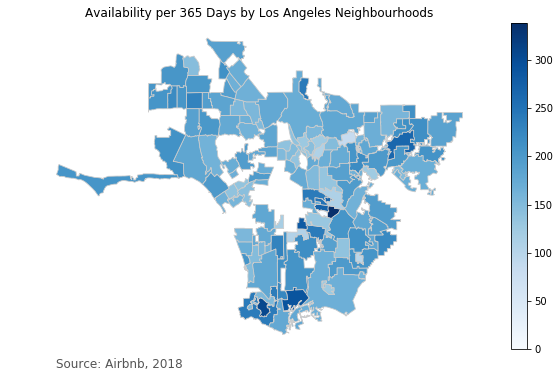

In [302]:
la_mapping = airbnb.loc[:,['latitude', 'longitude', 'availability_365', 'neighbourhood']]
la_mapping = la_mapping.dropna()
# Reading GeoJSON file
los_angeles = gpd.read_file("neighbourhoods.geojson")
print(los_angeles.head())

# Creating GeoDataFrame with Availability Means
means = la_mapping.groupby(['neighbourhood'])['availability_365'].mean()
counts = la_mapping.groupby(['neighbourhood'])['neighbourhood'].count()
la_df = pd.DataFrame({'neighbourhood':means.index, 'count':counts, 'mean':means})
la_df.index = np.arange(0, len(la_df))
la_merge_df = la_df.merge(los_angeles, on = 'neighbourhood')
means_df = pd.DataFrame({'neighbourhood':means.index, 'means':means})
la_means_merge = los_angeles.merge(means_df, on = 'neighbourhood')

# Set a variable that will call whatever column we want to visualise on the map
variable = 'means'

# Set the range for the choropleth
vmin, vmax = la_means_merge.means.min(), la_means_merge.means.max()

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# Plotting Polygons
la_plot = la_means_merge.plot(column = variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Removing Axis
ax.axis('off')

# Titling Graph
ax.set_title('Availability per 365 Days by Los Angeles Neighbourhoods')

# Creating Legend
sm = plt.cm.ScalarMappable(cmap = 'Blues',
                          norm = plt.Normalize(vmin=vmin, vmax=vmax)
                          )

# Empty array for the data range
sm._A = []

# Add colorbar to the figure
cbar = fig.colorbar(sm)

# Annotating Graph
ax.annotate('Source: Airbnb, 2018',
            xy = (0.1, .08),  
            xycoords = 'figure fraction', 
            horizontalalignment = 'left', 
            verticalalignment = 'top', 
            fontsize = 12, 
            color = '#555555')

# Correlations

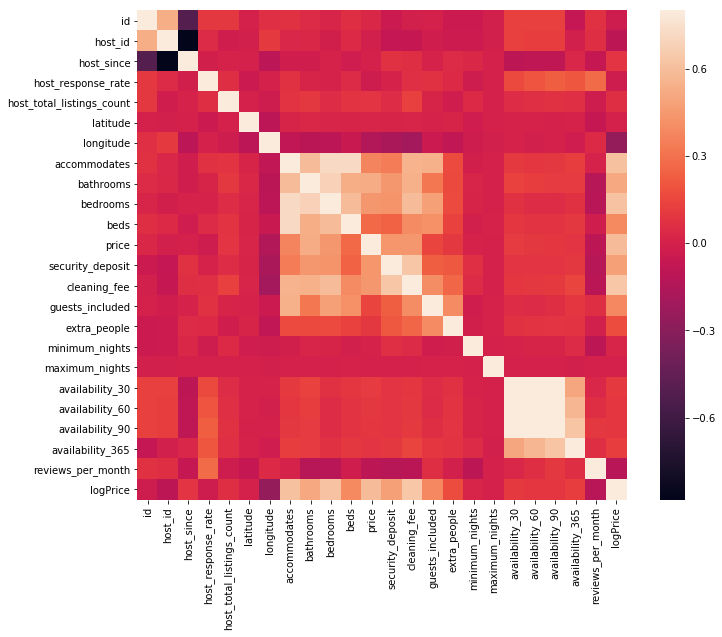

In [290]:
corrmat = airbnb.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

Even after dropping a lot of variables, our remaining one's still exhibit high correlation. We have further dropped more variables as explained below:

1. latitude and longitude: for our K-Means clustering, coordinates are simply too close together to be effectely used. Centering and scaling are also no possible. <br>
2. accomdates has a high correlation to price. <br>
3. bedrooms, bathrooms, and beds are all highly correlated. We choose to keep one of them: bedrooms. <br>
4. security_depost, cleaning fee, and extra people have high correlation with price. We choose to keep price. <br>
5. availability_365 is used over all other types of availability measurements <br>


# Model: K-Means Clustering

To start our clustering, we further cleaned our data to be completely numeric and also recreated another dataframe that included non-correlated data.

In [291]:
airbnb.room_type = airbnb.room_type.replace("Entire home/apt", 1)
airbnb.room_type = airbnb.room_type.replace("Shared room", .25)
airbnb.room_type = airbnb.room_type.replace("Private room", .5)
airbnb.room_type = pd.to_numeric(airbnb.room_type)

Kframe = airbnb.loc[:, ["host_since","host_response_rate", "host_total_listings_count", "room_type", "bedrooms", "logPrice", "availability_365", "reviews_per_month"]]
Kframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40375 entries, 0 to 44503
Data columns (total 8 columns):
host_since                   40375 non-null float64
host_response_rate           40375 non-null float64
host_total_listings_count    40375 non-null float64
room_type                    40375 non-null float64
bedrooms                     40375 non-null float64
logPrice                     40375 non-null float64
availability_365             40375 non-null int64
reviews_per_month            40375 non-null float64
dtypes: float64(7), int64(1)
memory usage: 4.0 MB


We then ran a loop to discover the inertias for the first 5 k models. The plot of the changes in inertia are below. We ended up setting for 3 clusters just as we predicted in our hypothesis.

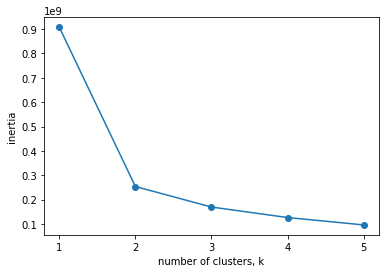

In [292]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(Kframe)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [293]:
model = KMeans(n_clusters = 3)
model.fit(Kframe)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

As our data is unlabeled, we wanted to see where are clusters truly center around and how they differentiate. Most importantly, we were curious to see if our clusters matched up with anecdotal evidence of Airbnb's abuses of local communities. The centroid coordinates across our 8 variables for our 3 clusters are shown below.

In [296]:
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids.columns = ["host_since","host_response_rate", "host_total_listings_count", "room_type", "bedrooms", "logPrice", "availability_365", "reviews_per_month"]
centroids

,host_since,host_response_rate,host_total_listings_count,room_type,bedrooms,logPrice,availability_365,reviews_per_month
0,2.894803,79.657617,8.609752,0.806573,1.401252,4.770374,134.782997,2.051617
1,3.163474,32.503070,4.414454,0.794493,1.291947,4.681511,21.454693,1.093753
2,3.276855,66.013220,9.758334,0.805403,1.490831,4.893687,332.153915,1.587398


Within our centroids, we see major differences in the variables of host_response_rate, host_total_listings_count, logPrice, and availability_365. Host_response_rate is of not much interest as a majority of those values were imputed to 0. We see clear divisions within some variables and will be discussing those divisions in the below graphics.

Our first graphic below, relates to the frequency of our clusters. We have defined them as below: <br> <br>
Cluster 0: Users who rent out their property when they are not using them. IE: vacation homes. These people have multiple listings but are on average available for only specific portions of the year. <br> <br>
Cluster 1: Users who rent out their property extremely infrequently. They most likely use the listing as a primary residence and only rent out when there is little utilization occuring. We beleive this group is the least likely to be violating short term rental laws. <br> <br>
Cluster 2: Users who are most likely abusing Airbnb's platform and violating short term rental laws. They have the most listings on the platform with almost year-round availability. The chance that they ever inhabit the property is extremely low and they most likely use airbnb as a business. <br> <br>

We'll be looking into what exactly seperates these clusters in the following graphics.


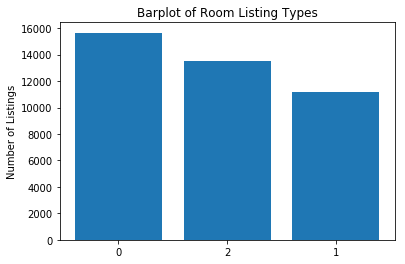

In [301]:
airbnb.Cluster = airbnb.Cluster.astype(str)
a = airbnb.Cluster.value_counts()
plt.bar(airbnb.Cluster.unique(), a)
plt.ylabel("Number of Listings")
plt.title("Barplot of Room Listing Types")
plt.show()

The boxplot below shows the spread of the log number of listings per cluster. We see that cluster 1, best described as unfrequent hosts with fewer properties, are distributed vastly smaller than the other clusters. Meanwhile clusters 0 and 2 hold relatively similar amounts of listings. They differ in other variables to be discussed further.

Text(0.5,1,'Log Number of Listings per Cluster')

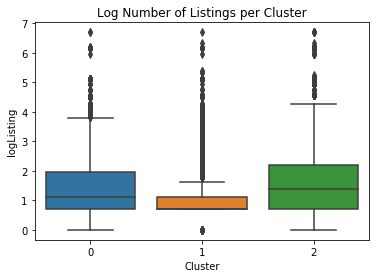

In [297]:
airbnb["Cluster"] = model.labels_
airbnb["logListing"] = np.log(airbnb.host_total_listings_count+1)
sns.boxplot(x = "Cluster", y = "logListing", data = airbnb).set_title("Log Number of Listings per Cluster")

One major variable that clusters 1 and 2 differ are in their availability as seen in the boxplots below. Cluster 1 has the least availability. We deemed this group the least likely to be violating short-term lease agreements as they have the least listings, the least availability, and least likely seen. Clusters 0 and 2 have similar availability, it appears that cluster 2 would be the more obvious candidate of violating short term lease agreements. The average number of days in availability in cluster 0 is about half of a year. It could hold reasonable that the owners of this listing use their property as a vacation home and than as a supplemental rental income in the off season.

Text(0.5,1,'Availability per Cluster')

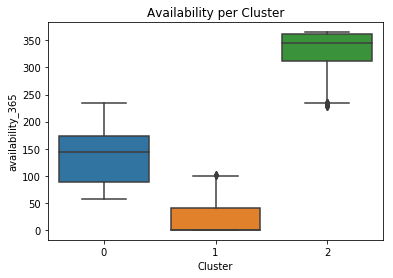

In [298]:
sns.boxplot(x = "Cluster", y = "availability_365", data = airbnb).set_title("Availability per Cluster")